## Importamos las librerias

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix 		#Usar para comprobar resultados
from sklearn.metrics import classification_report 	#Usar para comprobar resultados
import matplotlib.pyplot as plt
import seaborn as sns

## Importamos los datos

In [3]:
direction_pred = "../predictions.txt"
direction_truth = "../truth.txt"

yhat = pd.read_csv(direction_pred, header=None, names=["Rol"])["Rol"].map({"Jedi": 1, "Sith": 0})
y = pd.read_csv(direction_truth, header=None, names=["Rol"])["Rol"].map({"Jedi": 1, "Sith": 0})

## Definimos nuestras funciones de matriz

In [4]:
#Aqui contamos el porcentaje de fallos y aciertos de las predicciones(yhat) vs el resultado real(y) 
def calculate_matrix(y,y_predict):
    matrix = [[0,0],
              [0,0]]
    if y.size != y_predict.size:
        print("Error : y and yhat dont have the same size ")
        return matrix
    for index in range(y.size):
        if y.iloc[index] == y_predict.iloc[index] and y.iloc[index] == 1: #True positive
            matrix[0][0] = matrix[0][0] + 1
        elif y.iloc[index] != y_predict.iloc[index] and y_predict.iloc[index] == 1: # False positive
            matrix[1][0] = matrix[1][0] + 1
        elif y.iloc[index] == y_predict.iloc[index] and y.iloc[index] == 0: # True negative
            matrix[1][1] = matrix[1][1] + 1
        elif y.iloc[index] != y_predict.iloc[index] and y_predict.iloc[index] == 0: # False negative
            matrix[0][1] = matrix[0][1] + 1
        else:
            print ("Encontrado algo que no es echale el ojo")
    return matrix


#Calculamos las metricas
def calculate_metrics(matrix):
    TP = matrix[0][0] #True Positive
    FN = matrix[0][1] #False Negative
    FP = matrix[1][0] #False Positive
    TN = matrix[1][1] #True Negatve

    #Metrics for jedi
    precision_j = TP / (TP + FP) #precision para determinar un jedi
    recall_j = TP / (TP + FN) #sensibilidad para determinar un jedi
    f1_score_j = (2 * (precision_j * recall_j)) / (precision_j + recall_j)
    total_j = TP + FN #Total of jedis

    #Shit (i didnt meant sith) Metrics
    precision_s = TN / (TN + FN) #precision para determinar un sith
    recall_s = TN / (TN + FP) #sensibilidad para determinar un sith
    f1_score_s = (2 * (precision_s * recall_s)) / (precision_s + recall_s)
    total_s = TN + FP #Total of shits

	#accuracy over total predictions
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    total = TP + TN + FP + FN

    print(f"{'':<10}{'precision':>10}{'recall':>10}{'f1-score':>12}{'total':>8}")
    print(f"{'Jedi : 1':<10}{precision_j:>10.2f}{recall_j:>10.2f}{f1_score_j:>12.2f}{total_j:>8}")
    print(f"{'Sith : 0':<10}{precision_s:>10.2f}{recall_s:>10.2f}{f1_score_s:>12.2f}{total_s:>8}")
    print(f"{'accuracy':<30}{accuracy:>12.2f}{total:>8}")
    return  


#       Confusion Table
#           Predicción
#           1     0
#Real  1 | TP | FN |
#      0 | FP | TN |
#Funcion para el plot
def plot_confusion_matrix(matrix):
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Jedi : 1', 'Sith : 0']); ax.yaxis.set_ticklabels(['Jedi : 1', 'Sith : 0'])
    plt.show()

## Mostramos los resultados calculados por nuestras funciones

           precision    recall    f1-score   total
Jedi : 1        0.45      0.51        0.48      49
Sith : 0        0.47      0.41        0.44      51
accuracy                              0.46     100


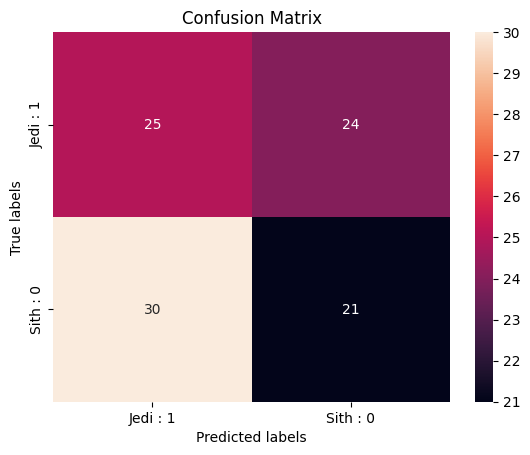

In [6]:
matrix = calculate_matrix(y,yhat)
calculate_metrics(matrix)
plot_confusion_matrix(matrix)

## Hacemos las mismas comprobaciones llamando a la funcion se Sklearn#Comprobacion contra las metricas de SKLEARN

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        51
           1       0.45      0.51      0.48        49

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.46      0.46      0.46       100



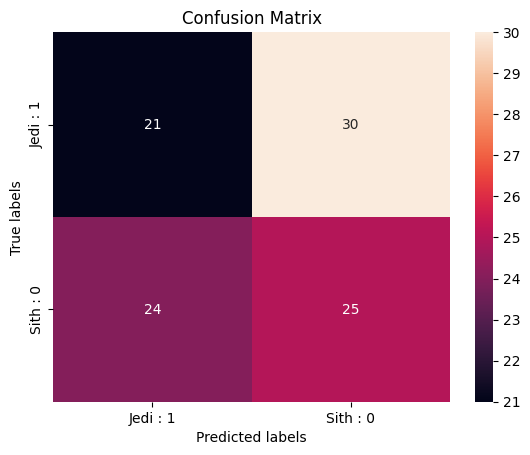

In [7]:
#Comprobacion contra las metricas de SKLEARN
matrix = confusion_matrix(y,yhat)
print(classification_report(y, yhat))
plot_confusion_matrix(matrix)